<a href="https://colab.research.google.com/github/thunyalak230/GE234_code_repository/blob/main/Code_repo_group1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Code Repository**
💹  ***visualization code***

---





# วัตถุประสงค์ของ **Code**


> เพื่อสร้างกราฟเส้นเปรียบเทียบความสัมพันธ์ระหว่างข้อมูลสองชุด โดยข้อมูลตัวอย่างที่เรานำมาใช้คือข้อมูลรายได้จากการท่องเที่ยว และ จำนวนนักท่องเที่ยว ของจังหวัดภูเก็ตในช่วงเวลาต่างๆ


# หลักการทำงาน


1.   นำเข้า Library (pandas,seaborn,matplotlib)
    และนำเข้าข้อมูลที่ต้องการทำกราฟ เตรียมข้อมูลโดย
    การทำความสะอาดข้อมูล
2.  การสร้างโครงสร้างกราฟแยกสเกล
ข้อมูลเป็น 2 แกน
3. สร้างระบบแกน Y สองด้าน รายได้และนักท่องเที่ยว
4. รวบรวมและนำข้อมูลมาซ้อนทับกันเพื่อให้เห็น
ความสัมพันธ์ของแนวโน้มที่เกิดขึ้น










In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# โหลดข้อมูลจากไฟล์ CSV
dataset = pd.read_csv('/content/data (2).csv') #นำเข้าข้อมูล data.csv จาก lab1 ก่อนถึงจะrunข้อมูลได้
# ทำความสะอาดคอลัมน์ 'Phuket Revenue (m baht)'
dataset['Phuket Revenue (m baht)'] = dataset['Phuket Revenue (m baht)'].astype(str).str.replace(',', '', regex=False)
dataset['Phuket Revenue (m baht)'] = pd.to_numeric(dataset['Phuket Revenue (m baht)'], errors='coerce')

# ทำความสะอาดคอลัมน์ 'Phuket visitor' หากมีค่าที่ไม่ใช่ตัวเลข
dataset['Phuket visitor'] = dataset['Phuket visitor'].astype(str).str.replace(',', '', regex=False)
dataset['Phuket visitor'] = pd.to_numeric(dataset['Phuket visitor'], errors='coerce')


📚 นำเข้า Libary (Pandas,Seaborn,Matplotlib)

**Pandas** : ไลบารีสำหรับจัดการและวิเคราะห์ข้อมูลที่เป็น
โครงสร้างตาราง

**Seaborn** : ไลบารีสำหรับการสร้างกราฟและภาพข้อมูล

**Matplotlib** : ไลบารีพื้นฐานสำหรับการสร้างกราฟ

✅ นำเข้าข้อมูลที่ต้องการใช้ในการทำกราฟ

🧹 ทำความสะอาดข้อมูล เนื่องจากไพทอนไม่เข้าใจข้อมูลตัวเลขที่มีเครื่องหมายจุลภาค ( , )

    dataset[] เพื่อเลือกคอลัมน์ที่ต้องการทำความสะอาด จาก DataFrame dataset
    .astype(str) เพื่อแปลงข้อมูลในคอลัมน์ที่ต้องการใช้ให้เป็นข้อมูล String (ข้อความ)
    str.replace() เพื่อค้นหาและแทนที่เครื่องหมายจุลภาค ‘,’ ด้วยช่องว่างเปล่า ‘ ‘
    pd.to_numeric() จากนั้นแปลงข้อมูลเป็น numeric (ตัวเลข) เพื่อให้ไพทอนเข้าใจข้อมูลตัวเลขสามารถคำนวนและสร้างกราฟได้


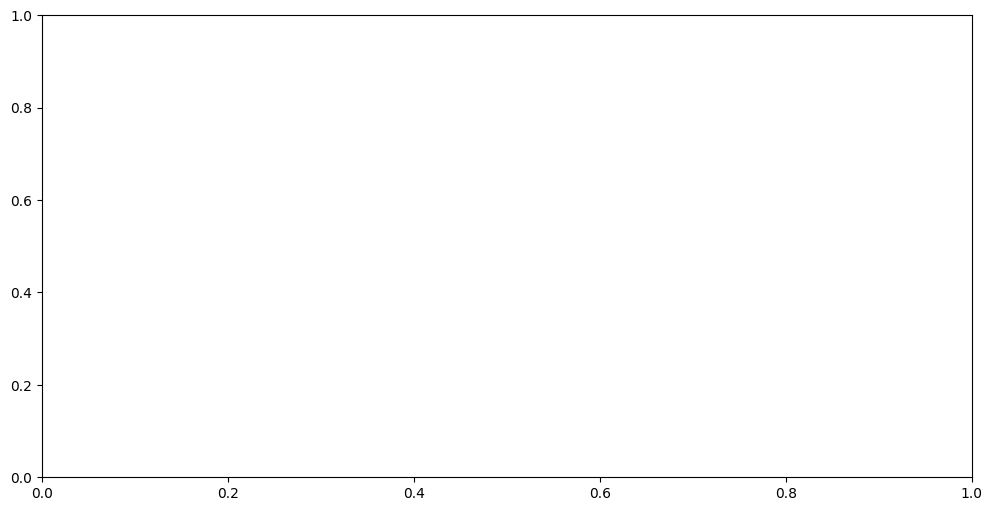

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))



*   เป็นการสร้าง fig (ตัวรูปภาพทั้งหมด) และ ax1 (พื้นที่วาดแกน X, Y)

*  ใช้ figsize=(12, 6) ระบุความกว้าง 12 นิ้ว และสูง 6 นิ้ว





In [ ]:
# พล็อตรายได้บนแกน Y ซ้าย
sns.lineplot(data=dataset, x='Year', y='Phuket Revenue (m baht)', ax=ax1, color='blue', label='Phuket Revenue (m baht)')
ax1.set_title('Phuket Revenue and Visitor Over Time')
ax1.set_xlabel('Year')
ax1.set_ylabel('Phuket Revenue (m baht)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# สร้างแกน Y ขวาสำหรับจำนวนนักท่องเที่ยว
ax2 = ax1.twinx()
sns.lineplot(data=dataset, x='Year', y=dataset['Phuket visitor'] / 1000000, ax=ax2, color='red', label='Phuket visitor (Millions)')
ax2.set_ylabel('Phuket visitor (Millions)', color='red')
ax2.tick_params(axis='y', labelcolor='red')


1. การสร้างกราฟแกนแรก
*   การสร้างกราฟแกนแรก
ใช้ sns.lineplot สร้างกราฟเส้นแสดง รายได้ (Revenue) โดยใช้สีน้ำเงิน
*   มีการตั้งค่าแกน Y ทางด้านซ้าย และใส่ Grid เพื่อให้ดูง่าย
2. การสร้างแกนที่สองด้วย twinx()


* ax2 = ax1.twinx() : คำสั่งนี้จะสร้างแกน Y ใหม่ขึ้นมาทาง ด้านขวา
โดยที่ยังใช้แกน X (Year) ร่วมกับกราฟแรกอยู่
* ปรับสเกล: ในโค้ดจะมีการหารจำนวนนักท่องเที่ยวด้วย 1,000,000 เพื่อเปลี่ยนหน่วยให้เป็น "ล้านคน" ทำให้ตัวเลขบนกราฟไม่กระโดดจนเกินไป
* สี: ใช้สีแดงสำหรับข้อมูลนักท่องเที่ยว เพื่อให้ผู้ดูแยกแยะได้ว่าแกนซ้าย(น้ำเงิน) เป็นรายได้ และแกนขวา(แดง) เป็นจำนวนนักท่องเที่ยว








In [ ]:
# รวม legend จากทั้งสองแกน
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

📈
การรวมคำอธิบายกราฟ
ปกติแล้วถ้าเราแยกแกน Legend (คำอธิบายสัญลักษณ์) จะขึ้นแยกกันและ
อาจทับซ้อนกัน โค้ดส่วนสุดท้ายจึงทำการ:

* ดึง Label จากทั้ง ax1 และ ax2 มารวมกัน
* สั่งให้แสดง Legend ชุดเดียวที่มุมบนซ้าย ด้วยโค้ด(loc='upper left')

  เพื่อความสวยงามและเป็นระเบียบ
```
plt.tight_layout() เป็นคำสั่งที่ใช้ในการปรับองค์ประกอบต่างๆ ของกราฟโดยอัตโนมัติ
plt.show() เป็นคำสั่งที่ใช้สำหรับแสดงผลกราฟ
```





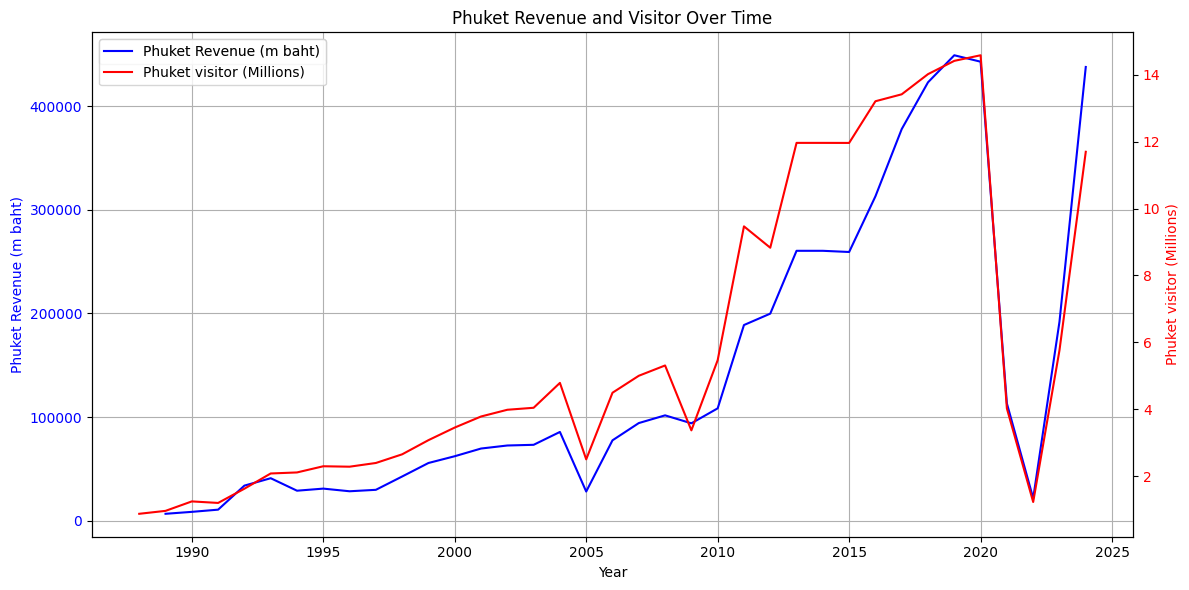

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# โหลดข้อมูลจากไฟล์ CSV
dataset = pd.read_csv('/content/data (2).csv')
# ทำความสะอาดคอลัมน์ 'Phuket Revenue (m baht)'
dataset['Phuket Revenue (m baht)'] = dataset['Phuket Revenue (m baht)'].astype(str).str.replace(',', '', regex=False)
dataset['Phuket Revenue (m baht)'] = pd.to_numeric(dataset['Phuket Revenue (m baht)'], errors='coerce')

# ทำความสะอาดคอลัมน์ 'Phuket visitor' หากมีค่าที่ไม่ใช่ตัวเลข
dataset['Phuket visitor'] = dataset['Phuket visitor'].astype(str).str.replace(',', '', regex=False)
dataset['Phuket visitor'] = pd.to_numeric(dataset['Phuket visitor'], errors='coerce')

fig, ax1 = plt.subplots(figsize=(12, 6))

# พล็อตรายได้บนแกน Y ซ้าย
sns.lineplot(data=dataset, x='Year', y='Phuket Revenue (m baht)', ax=ax1, color='blue', label='Phuket Revenue (m baht)')
ax1.set_title('Phuket Revenue and Visitor Over Time')
ax1.set_xlabel('Year')
ax1.set_ylabel('Phuket Revenue (m baht)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# สร้างแกน Y ขวาสำหรับจำนวนนักท่องเที่ยว
ax2 = ax1.twinx()
sns.lineplot(data=dataset, x='Year', y=dataset['Phuket visitor'] / 1000000, ax=ax2, color='red', label='Phuket visitor (Millions)')
ax2.set_ylabel('Phuket visitor (Millions)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# รวม legend จากทั้งสองแกน
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()